Topic: 
Investigating the Effects of Socioeconomic Factors 
on Household Savings in the United Kingdom

Prepared by
Temitope Thomas Adekoya-Cole

In [111]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
import matplotlib
from pandas import *
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

# Introduction
This project attempts to investigate the factors the effects of socioeconomic factors on household savings. Using the Cross-Industry Standard Process for Data Mining as a guide, public household survey data will be mined, passed through machine learning algorithms for relationships and correlations will be extracted and the results communicated for appropriate use. The program that will be used for the analysis is Python version 3.2.1 and the report will contain snippets of code used.

# Business Understanding
A household is a social unit made up of people living in a single dwelling. It could include related people as well as unrelated people. The members of these households are individually and collectively affected by various socio - economic factors and some of these factors have direct or indirect correlation with the possibility of the household having savings.

Household savings refers to the money that is available for the occupants of a dwelling after all expenditures, such as tax and payments for consumption of goods and services. It is an essential factor for the long-term growth of an economy as it is the primary source of domestic loanable funds, besides savings from business and public sectors. (Penpoin, 2022) 

The household savings ratio (household savings as a proportion of household disposable income) increased from 8.9% in January-March 2020 to 25.9% in April-July 2020, a record high since the series began in 1987 due to the restrictions and subsequent financial support measures put in place because of the coronavirus (COVID-19) pandemic (Francis-Devine, 2021). 

Though the pandemic increased household savings generally, not all families were fortunate. While some individuals were made better-off by keeping jobs, reducing spending, and building savings others were made worse-off by losing income and using savings or debt to survive. This led to longer-term impacts on financial resilience and wellbeing and further increased the wealth gap. “High-income families are more likely to have improved balance sheets than low-income families” (Shah, 2021). 

This ‘wealth gap’ will lead to a rise in inequality if measures are not put in place to balance out the effects of the pandemic post-lockdown as there has been an increase in spending and increased cost-of-living pressures which has caused the UK household savings rate decline to pre-pandemic levels (PwC , 2022).

## Aims and Objectives
The aim of this project is to provide advice to government and stakeholders on which socio-economic factors needs to be monitored, tracked, and adjusted to ensure that the gap in Household savings (wealth) is adequately reduced and kept as balanced as possible. I will attempt to do this by fulfilling the below objectives.
1. Identify the relevant factors influencing household savings
2. Understand the relationship between the factors and household savings
3. Identify the probability of a household to have savings or not
4. Predict the change in household savings if certain factors are changed.

# Data Understanding
The dataset for this project is called Bank of England/NMG household survey data and is gotten from Bank of England - Research datasets (https://www.bankofengland.co.uk/statistics/research-datasets). It is an annual survey that asks people questions about their income and spending, carried out by NMG Consulting on behalf of the Bank of England. The survey covers a period of 2004 - 2021 however, this project will only focus on 2021 the year after the coronavirus (COVID-19) pandemic (2020) due its extensive changes to life. (Bank of England, 2022)

Page: https://www.bankofengland.co.uk/statistics/research-datasets  

Download link: https://www.bankofengland.co.uk/-/media/boe/files/statistics/research-datasets/boe-nmg-household-survey-data.xlsx?la=en&hash=10A425F0548138880D5861DD6D2DEF9CFAD2E776  

The data for the year 2021 is made up of responses from 6,051 individual households with 1922 columns attached to each. The responses for each variable have been transformed and categorized so all the entries are ordinal numbers.
No data "cleaning", i.e., modification of existing variables or creation of new ones, has been performed for this dataset, except for removing the free text answers to questions for sensitivity reasons.

In [112]:
hs = pd.read_excel('boe-nmg-household-survey-data.xlsx', sheet_name='2021')

In [113]:
# This displays the top N rows of a dataframe. The default is 5.
print ('===================================================================')
print ('First 5 rows of the Bank of England/NMG household survey data 2021')
print ('===================================================================')
hs.head()

First 5 rows of the Bank of England/NMG household survey data 2021


,we_factor,subsid,dsoc,dsocial,fgenage_1,dage,dregion,fgen,qhousing,dhousing,...,cv12b_4,cv12b_5,cv12b_97,cv12c_1,cv12c_2,cv12c_3,cv12c_4,cv12c_97,ret2021sep,mh04
0,0.927093,NaN,NaN,NaN,60,5,7,2,2,2,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,4,NaN
1,0.882265,NaN,NaN,NaN,55,5,8,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
2,0.971339,NaN,NaN,NaN,44,3,6,2,1,1,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,4,3.0
3,0.930587,NaN,NaN,NaN,41,3,8,1,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
4,0.940714,NaN,NaN,NaN,37,3,1,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3.0


In [114]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051 entries, 0 to 6050
Columns: 1922 entries, we_factor to mh04
dtypes: float64(1842), int64(80)
memory usage: 88.7 MB


# Data Preparation and Exploration
Due to the number of variables available and limits to the number of columns that the modeling tools can handle, extensive data reduction and clean-up steps will be required to be taken.

## Variable Reduction
An initial analysis based on rationality was used to reduce the variables such that only the most relevant variables in relation to our target variable was kept for further analysis.

Out if 1922 columns, the dataset was reduced to 13 columns covering 12 possible independent variables and 1 dependent variable (boe65a - Household_Savings) which is the target. The new data frame now has 13 columns and 6051 rows.
1.	dage - Represents the Age of the respondent.
2.	fgen - Represents the Gender of the respondent.
3.	dhousing - Represents the Housing_Status of the respondent.
4.	qual - Represents the Qualification of the respondent.
5.	qregion - Represents the Region of the respondent.
6.	nochildren - Represents the No_of_children of the respondent.
7.	otheradults - Represents the Other_adults of the respondent.
8.	dsocialgrade - Represents the Social_grade of the respondent.
9.	overallincomecomb - Represents the Household_income of the respondent.
10.	boe97combined - Represents the Household_loans of the respondent.
11.	a20dworking - Represents the Work_Status of the respondent.
12.	qmarital - Represents the Marital_status of the respondent.
13.	boe65a - Represents the Household_Savings of the respondent.

In [115]:
# The function drop is used to drop specific columns. An argument of columns.difference is added so that all columns asides from the selected would be dropped.
hs = hs.drop(hs.columns.difference(['boe97combined','a20dworking','dsocialgrade','otheradults','dhousing','dage','qregion','fgen', 'nochildren','qmarital','qual','boe65a','overallincomecomb']), axis=1)

In [116]:
# The shape function shows the number of rows and columns in a data frame.
hs.shape

(6051, 13)

## Data Formatting and Clean-Up
Certain changes such as data formatting, handling of missing values and data clean-up will be required to make the data easily readable and useable in the modelling techniques that will be used.

Review of the data showed that a few responses were not stated or provided by the client. To have data frame with definite responses, rows with response ‘Not stated’ will be deleted.

### Change of Variable Names
The names of the variables were changed from those in the initial dataset to names that will be easily understandable as detailed in Table 2. 

In [117]:
# The rename function replaces the names of columns as the argument axis= column was included.
hs = hs.rename({'dage':'Age','fgen':'Gender','dhousing':'Housing_Status','qual':'Qualification','qregion':'Region','nochildren':'No_of_children','boe65a':'Household_Savings','otheradults':'Other_adults','dsocialgrade':'Social_grade','overallincomecomb':'Household_income','boe97combined':'Household_loans','a20dworking':'Work_Status','qmarital':'Marital_Status'}, axis='columns')

In [118]:
# iloc is used to rearranged columns in a data frame based on the index number.
hs = hs.iloc[:, [5,0,1,3,4,12,2,9,8,6,10,11,7]]

In [119]:
# The info method gives the column names, data types, number of non-null values and memory usage
print ('===================================================================')
print ('Meta table of characteristics of each variable in the new Data Frame')
print ('===================================================================')
hs.info()

Meta table of characteristics of each variable in the new Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6051 entries, 0 to 6050
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             6051 non-null   int64  
 1   Age                6051 non-null   int64  
 2   Gender             6051 non-null   int64  
 3   Marital_Status     0 non-null      float64
 4   Qualification      6051 non-null   int64  
 5   Work_Status        6051 non-null   int64  
 6   Housing_Status     6051 non-null   int64  
 7   Social_grade       6051 non-null   int64  
 8   Other_adults       6051 non-null   int64  
 9   No_of_children     6051 non-null   int64  
 10  Household_income   6051 non-null   int64  
 11  Household_loans    3056 non-null   float64
 12  Household_Savings  6051 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 614.7 KB


In [120]:
# This displays the top N rows of a dataframe. The default is 5.
print ('===================================================================')
print ('First 5 rows of the Reduced Data Frame')
print ('===================================================================')
hs.head()

First 5 rows of the Reduced Data Frame


,Region,Age,Gender,Marital_Status,Qualification,Work_Status,Housing_Status,Social_grade,Other_adults,No_of_children,Household_income,Household_loans,Household_Savings
0,10,5,2,NaN,3,1,2,3,3,1,12,25.0,19
1,9,5,2,NaN,5,1,2,2,2,0,17,NaN,17
2,7,3,2,NaN,5,2,1,6,1,0,12,NaN,1
3,9,3,1,NaN,5,1,4,2,3,1,16,3.0,2
4,3,3,2,NaN,3,1,1,4,5,2,17,26.0,5


### Missing Values
The columns Marital Status and Household loans have 6051 and 2995 missing values respectively. The missing values will be cleaned up depending on the number of missing values and how methods of handling these missing values will affect the analysis.

In [121]:
# isna().sum() is used to display the number of missing values in each column of the data frame. The table displayed will have only values greater than 0 due to the > 0 argument inculded
print ('============================================')
print ('Table of null values in dataframe')
print ('============================================')
missing_variables = hs.isnull().sum()
missing_variables[missing_variables > 0]

Table of null values in dataframe


Marital_Status     6051
Household_loans    2995
dtype: int64

### Variable Review and Transformation

#### Region
The responses in the variable 'Region' have been pre transformed into integers, North (1), North West (2), Yorks & Humberside (3), West Midlands (4), East Midlands (5), East Anglia (6), South West (7), South East (8), Greater London (9), Wales (10), Scotland (11), Northern Ireland (12), Not On Map (99), Non UK (13).

In [122]:
np.sort(hs['Region'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

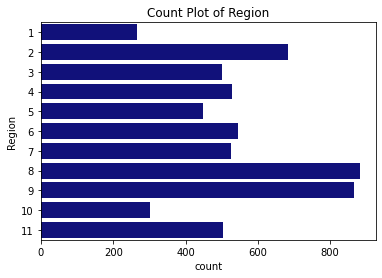

In [123]:
# Countplot used to display the number of frequencies occurrence of the variable.
sns.countplot(y='Region', data=hs, color = 'darkblue')
plt.title('Count Plot of Region')
plt.show()

#### Age
The variable 'Age' is made up of 6 age groups, 18 - 24 (1), 25 - 34 (2), 35 - 44 (3), 45 - 54 (4), 55 - 64 (5) 
and 65+ (6). The format will be left as it as it matches the required format for analysis.

In [124]:
np.sort(hs['Age'].unique())

array([1, 2, 3, 4, 5, 6])

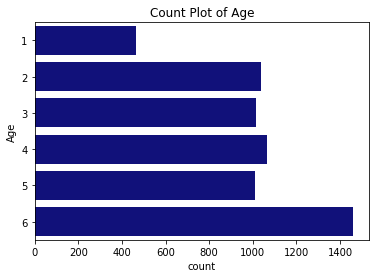

In [125]:
sns.countplot(y='Age', data=hs, color = 'darkblue')
plt.title('Count Plot of Age')
plt.show()

#### Gender
The responses in the variable 'Gender' have been pre transformed into integers, Male (1), Female (2), Not given (97).

The below shows that the variable 'Gender' has 6 responses stored as ‘Not given’. The responses stored as ‘Not given’ were filtered out and only the response with Male (1) and Female (2) were retained.

In [126]:
np.sort(hs['Gender'].unique())

array([ 1,  2, 97])

In [127]:
hs['Gender'].value_counts() 

2     3078
1     2967
97       6
Name: Gender, dtype: int64

In [128]:
hs = hs[hs['Gender'] < 97]

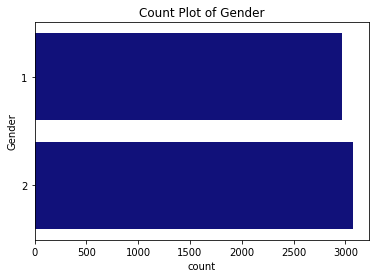

In [129]:
sns.countplot(y='Gender', data=hs, color = 'darkblue')
plt.title('Count Plot of Gender')
plt.show()

#### Marital_Status
This variable has no values (6,051 null values), as such, the entire column will be droped.

In [130]:
hs['Marital_Status'].isna().sum()

6045

In [131]:
hs = hs.drop(['Marital_Status'], axis=1)

#### Qualification
The responses in the variable 'Qualification' have been pre transformed into integers, GCSE / O-Level / CSE (1), Vocational qualifications (=NVQ1+2), (2), A-Level or equivalent (=NVQ3) (3), Bachelor Degree or equivalent (=NVQ4) (4), Masters, PHD or equivalent (5), Other (6), No formal qualifications (7) and Still studying (8).

In [132]:
np.sort(hs['Qualification'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

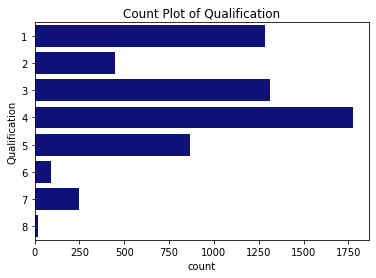

In [133]:
sns.countplot(y='Qualification', data=hs, color = 'darkblue')
plt.title('Count Plot of Qualification')
plt.show()

#### Work_Status
The responses in the variable 'Work_Status' have been pre transformed into integers, Working (1), Non-working (2). Using Python Code 8 the categorization was transformed to categories Working (1) and Non-working (0).

In [134]:
np.sort(hs['Work_Status'].unique())

array([1, 2])

In [135]:
hs = hs.replace({'Work_Status': {2 : 0}})

In [136]:
np.sort(hs['Work_Status'].unique())

array([0, 1])

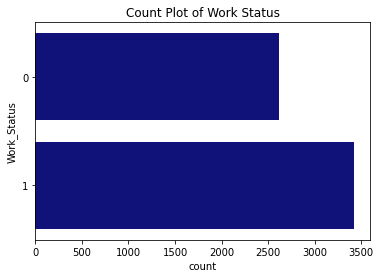

In [137]:
sns.countplot(y='Work_Status', data=hs, color = 'darkblue')
plt.title('Count Plot of Work Status')
plt.show()

#### Housing_Status
The responses in the variable 'Housing_Status' have been pre transformed into the integers, Owned Mortg (1), Owned Outright (2), Rent LA (3), Rent Private (4) and Other/DK/Ref (98).

The below shows that the variable 'Housing_Status' has 40 responses stored as ‘Other/DK/Ref (98). The responses stored as ‘Other/DK/Ref’ were filtered out and only the response with Owned Mortg (1), Owned Outright (2), Rent LA (3) and Rent Private (4) retained.

In [138]:
np.sort(hs['Housing_Status'].unique())

array([ 1,  2,  3,  4, 98])

In [139]:
hs['Housing_Status'].value_counts()

2     2139
1     1819
4     1066
3      981
98      40
Name: Housing_Status, dtype: int64

In [140]:
hs = hs[hs['Housing_Status'] < 98]

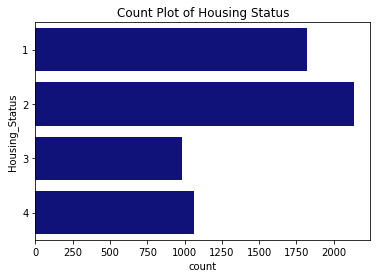

In [141]:
sns.countplot(y='Housing_Status', data=hs, color = 'darkblue')
plt.title('Count Plot of Housing Status')
plt.show()

#### Social_grade
The responses in the variable 'Social_grade' have been pre transformed into integers, A: Higher managerial/ professional/ administrative (1), B: Intermediate managerial/ professional/ administrative (2), C1: Supervisory or clerical/ junior managerial/ professional/ administrative AND Students (3), C2: Skilled manual worker (4), D: Semi or unskilled manual work (5) and E: Not in permanent employment (homemaker/unemployed/full-time carer/retired on state pension), (6).

Using the code below the categorization was rearranged to align with the improvement in Social_grade. The new categorization was made to A: Higher managerial/ professional/ administrative (6), B: Intermediate managerial/ professional/ administrative (5), C1: Supervisory or clerical/ junior managerial/ professional/ administrative AND Students (4), C2: Skilled manual worker (3), D: Semi or unskilled manual work (2) and E: Not in permanent employment (homemaker/unemployed/full-time carer/retired on state pension), (1).

In [142]:
hs = hs.replace({'Social_grade': {1 : 6, 2 : 5, 3 : 4, 4 : 3, 5 : 2, 6 : 1}})

In [143]:
np.sort(hs['Social_grade'].unique())

array([1, 2, 3, 4, 5, 6])

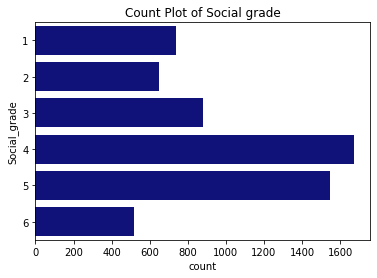

In [144]:
sns.countplot(y='Social_grade', data=hs, color = 'darkblue')
plt.title('Count Plot of Social grade')
plt.show()

#### Other_adults
The variable 'Other_adults' is made up of 8 categories, per number of other adults in the household. 0 (1), 1 (2), 2 (3), 3 (4), 4 (5), 5 (6), 6 (7) and More than 6 (8).

In [145]:
np.sort(hs['Other_adults'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8])

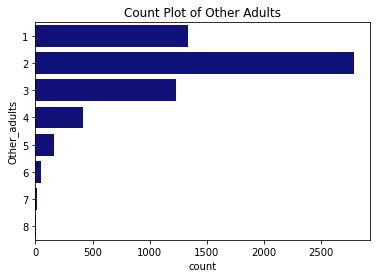

In [146]:
sns.countplot(y='Other_adults', data=hs, color = 'darkblue')
plt.title('Count Plot of Other Adults')
plt.show()

#### No_of_children
The variable 'No_of_children' is made up of 12 categories per number of children in the household, 0 (0), 1 (1), 2 (2), 3 (3), 4 (4), 5 (5), 6 (6), 7 (7), 8 (8), 9 (9), 10 (10) and More than 10 (13). 

In [147]:
np.sort(hs['No_of_children'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13])

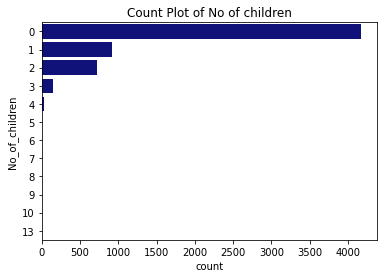

In [148]:
sns.countplot(y='No_of_children', data=hs, color = 'darkblue')
plt.title('Count Plot of No of children')
plt.show()

#### Household_income
The variable 'Household_income' is made up of 18 categories, per total combined income of members of the household. Less than 0 (0), 0 (1), £1 – £2,499 (2), £2,500 - £4,499 (3), £4,500 - £6,499 (4), £6,500 - £7,499 (5), £7,500 - £9,499 (6), £9,500 - £11,499 (7), £11,500 - £13,499 (8), £13,500 - £15,499 (9), £15,500 - £17,499 (10), £17,500 - £24,999 (11), £25,000 - £34,999 (12), £35,000 - £44,999 (13), £45,000 - £54,999 (14), £55,000 - £74,999 (15), £75,000 - £99,999 (16), £100,000 or more (17) and Don't know/Not stated (18). 

Using the code below the 680 responses in category 18 was replaced with the mode (most frequent) category of the responses (12) as the respondents did not provide an accurate answer.

In [149]:
np.sort(hs['Household_income'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [150]:
hs['Household_income'].value_counts()

12    769
13    710
11    691
18    680
15    599
14    463
16    403
17    399
9     196
3     178
7     168
8     166
10    145
6     107
1      93
4      90
2      86
5      62
Name: Household_income, dtype: int64

In [151]:
hs['Household_income'].mode()

0    12
dtype: int64

In [152]:
hs = hs.replace({'Household_income': {18 : 12}})

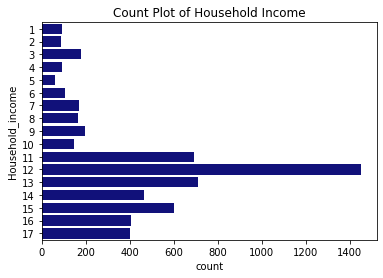

In [153]:
sns.countplot(y='Household_income', data=hs, color = 'darkblue')
plt.title('Count Plot of Household Income')
plt.show()

#### Household_loans
The responses in the variable Household loans have been pre transformed into integers, £199 or less (1), £200 to £499 (2), £500 to £999 (3), £1,000 to £1,499 (4), £1,500 to £1,999 (5), £2,000 to £2,499 (6), £2,500 to £2,999 (7), £3,000 to £3,499 (8), £3,500 to £3,999 (9), £4,000 to £4,499 (10), £4,500 to £4,999 (11), £5,000 to £5,499 (12), £5,500 to £5,999 (13), £6,000 to £6,499 (14), £6,500 to £6,999 (15), £7,000 to £7,499 (16), £7,500 to £7,999 (17), £8,000 to £8,499 (18), £8,500 to £8,999 (19), £9,000 to £9,499 (20), £9,500 to £9,999 (21), £10,000 to £14,999 (22), £15,000 to £19,999 (23), £20,000 to £24,999 (24), £25,000 to £29,999 (25), £30,000 or more (26) and Don't know/Not stated (99).

The Household_loans variable has 2967 missing values. We cannot delete the responses as it is a high percentage of our data however, the null values will be filled with the response from the previous row as seen in the code below.

In [154]:
np.sort(hs['Household_loans'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       99., nan])

In [155]:
hs['Household_loans'].isna().sum()

2967

In [156]:
# Forward fill
hs['Household_loans'] = hs['Household_loans'].fillna(method='ffill')

In [157]:
hs['Household_loans'].value_counts().head(4)

1.0     683
99.0    656
2.0     526
22.0    438
Name: Household_loans, dtype: int64

In [158]:
hs = hs[hs['Household_loans'] < 99]

In [159]:
hs['Household_loans'] = hs['Household_loans'].astype('int64')

<ipython-input-159-4d7b5ab32ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs['Household_loans'] = hs['Household_loans'].astype('int64')


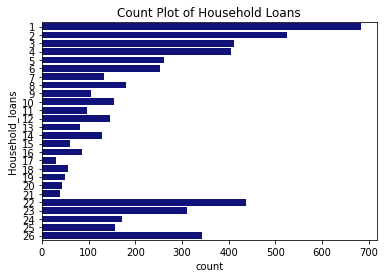

In [160]:
sns.countplot(y='Household_loans', data=hs, color = 'darkblue')
plt.title('Count Plot of Household Loans')
plt.show()

In [161]:
# histp()

#### Household_Savings
The variable 'Household_Savings' which is our target is made up of 28 categories based on the amount of household savings. - I have no savings (1), £1 - £499 (2), £500 - £999 (3), £1,000 - £1,999 (4), £2,000 - £2,999 (5), £3,000 - £3,999 (6), £4,000 - £4,999 (7), £5,000 - £5,999 (8), £6,000 - £6,999 (9), £7,000 - £7,999 (10), £8,000 - £8,999 (11), £9,000 - £9,999 (12), £10,000 - £12,499 (13), £12,500 - £14,999 (14), £15,000 - £17,499 (15), £17,500 - £19,999 (16), £20,000 - £24,999 (17), £25,000 - £29,999 (18), £30,000 - £34,999 (19), £35,000 - £39,999 (20), £40,000 - £44,999 (21), £45,000 - £49,999 (22), £50,000 - £74,999 (23), £75,000 - £99,999 (24), £100,000 - £149,999 (25), More than £150,000 (26), Don’t know (97) and Prefer not to state (96).

This project requires is to find out if based on the other variables, a household will have savings (1) or not have savings (0). As detailed below the 538 clients who responded, ‘Don’t know (97)’ and ‘Prefer not to state (96)’ were removed from the data frame for seamless analysis. The target variable then encoded such that Category 1, ‘I have no savings’ was transformed into 0, while all the categories 2 all the way to 26 (£1 - More than £150,000) was transformed to 1. 

In [162]:
np.sort(hs['Household_Savings'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 96, 97])

In [163]:
(hs['Household_Savings'] > 95).value_counts()

False    4811
True      538
Name: Household_Savings, dtype: int64

In [164]:
hs = hs[hs['Household_Savings'] < 96]

In [165]:
# Encode target value 0 for No outcome and 1 where there is an outcome using lamda
hs['Household_Savings'] = hs['Household_Savings'].apply(lambda x: 0 if x == 1 else 1)

<ipython-input-165-3e16fe177138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs['Household_Savings'] = hs['Household_Savings'].apply(lambda x: 0 if x == 1 else 1)


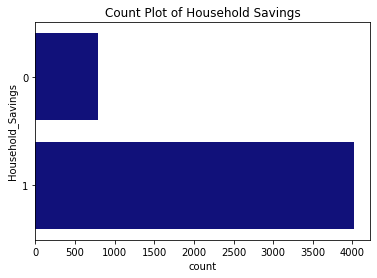

In [166]:
sns.countplot(y='Household_Savings', data=hs, color = 'darkblue')
plt.title('Count Plot of Household Savings')
plt.show()

In [167]:
df = hs.copy().reset_index(drop=True)

## Prepared Data Frame
The data frame after preparation is made up of 4811 entries with 12 columns including the target variable Household_Savings (Table 4). All the variables are stored as ordinal number variables and have been cleaned, appropriately coded and are all of integer data type which can be used for further analysis (Table 5).

In [168]:
print ('===================================================================')
print ('Meta table of characteristics of the Prepared Data Frame')
print ('===================================================================')
df.info()

Meta table of characteristics of the Prepared Data Frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Region             4811 non-null   int64
 1   Age                4811 non-null   int64
 2   Gender             4811 non-null   int64
 3   Qualification      4811 non-null   int64
 4   Work_Status        4811 non-null   int64
 5   Housing_Status     4811 non-null   int64
 6   Social_grade       4811 non-null   int64
 7   Other_adults       4811 non-null   int64
 8   No_of_children     4811 non-null   int64
 9   Household_income   4811 non-null   int64
 10  Household_loans    4811 non-null   int64
 11  Household_Savings  4811 non-null   int64
dtypes: int64(12)
memory usage: 451.2 KB


In [169]:
# This displays the top N rows of a dataframe. The default is 5.
print ('===================================================================')
print ('First 5 rows of the Prepared Data Frame')
print ('===================================================================')
df.head()

First 5 rows of the Prepared Data Frame


,Region,Age,Gender,Qualification,Work_Status,Housing_Status,Social_grade,Other_adults,No_of_children,Household_income,Household_loans,Household_Savings
0,10,5,2,3,1,2,4,3,1,12,25,1
1,9,5,2,5,1,2,5,2,0,17,25,1
2,7,3,2,5,0,1,1,1,0,12,25,0
3,9,3,1,5,1,4,5,3,1,16,3,1
4,3,3,2,3,1,1,3,5,2,17,26,1


In [170]:
# Convert all columns to int dtype.
# df = df.astype('int64')

# Modelling
For this project the below models will be used, evaluated the compared
•	Decision Tree Model
•	Random Forest Model
•	Naive Bayes Model
•	K-Nearest Neighbors Model
•	Logistic Regression Model
•	Neural Networks Model

## Pre-Modelling Steps

### Feature Selection
Using the SelectKBest function of sklearn feature_selection, the feature the target variable was computed and the top 8 were selected. This indicated that the top 8 features that affected household savings were 'Region', 'Age', 'Qualification', 'Housing_Status', 'Social_grade', 'No_of_children', 'Household_income and Household_loans.

In [171]:
#Extracting Attributes / input variables
Features = df.iloc[0:,:-1]

# Extracting Target / Class Labels
Target = df.iloc[0:,-1]

In [172]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            4811 non-null   int64
 1   Age               4811 non-null   int64
 2   Gender            4811 non-null   int64
 3   Qualification     4811 non-null   int64
 4   Work_Status       4811 non-null   int64
 5   Housing_Status    4811 non-null   int64
 6   Social_grade      4811 non-null   int64
 7   Other_adults      4811 non-null   int64
 8   No_of_children    4811 non-null   int64
 9   Household_income  4811 non-null   int64
 10  Household_loans   4811 non-null   int64
dtypes: int64(11)
memory usage: 413.6 KB


In [173]:
from sklearn.feature_selection import SelectKBest, chi2

In [174]:
Features_new = SelectKBest(score_func=chi2, k=8)

In [175]:
Features_new.fit_transform(Features, Target)

array([[10,  5,  3, ...,  1, 12, 25],
       [ 9,  5,  5, ...,  0, 17, 25],
       [ 7,  3,  5, ...,  0, 12, 25],
       ...,
       [ 6,  3,  1, ...,  2, 12, 12],
       [ 8,  3,  1, ...,  1,  9,  4],
       [ 8,  3,  1, ...,  1, 13,  7]])

In [176]:
cols = Features_new.get_support(indices=True)

In [177]:
Features = Features.iloc[:,cols]

In [178]:
Features_names = Features.columns[:-1].values.tolist()
Features_names

['Region',
 'Age',
 'Qualification',
 'Housing_Status',
 'Social_grade',
 'No_of_children',
 'Household_income']

In [179]:
Features.head()

,Region,Age,Qualification,Housing_Status,Social_grade,No_of_children,Household_income,Household_loans
0,10,5,3,2,4,1,12,25
1,9,5,5,2,5,0,17,25
2,7,3,5,1,1,0,12,25
3,9,3,5,4,5,1,16,3
4,3,3,3,1,3,2,17,26


In [180]:
# Merging the selected features with the target
df = pd.concat([Features, df['Household_Savings'].reindex(Features.index)], axis=1)


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Region             4811 non-null   int64
 1   Age                4811 non-null   int64
 2   Qualification      4811 non-null   int64
 3   Housing_Status     4811 non-null   int64
 4   Social_grade       4811 non-null   int64
 5   No_of_children     4811 non-null   int64
 6   Household_income   4811 non-null   int64
 7   Household_loans    4811 non-null   int64
 8   Household_Savings  4811 non-null   int64
dtypes: int64(9)
memory usage: 338.4 KB


### Training and test data splitting

In [182]:
#Extracting Attributes / input variables
X = df.iloc[0:,:-1]

# Extracting Target / Class Labels
y = df.iloc[0:,-1]

In [183]:
X.head()

,Region,Age,Qualification,Housing_Status,Social_grade,No_of_children,Household_income,Household_loans
0,10,5,3,2,4,1,12,25
1,9,5,5,2,5,0,17,25
2,7,3,5,1,1,0,12,25
3,9,3,5,4,5,1,16,3
4,3,3,3,1,3,2,17,26


In [184]:
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.30)

Using the train_test_split function, the data frames for the independent variable (X) and the dependent target variable (y) in to training and testing data. Using a random state of 50 for shuffling, the data was split into 70% training data and 30% test data so that the output can be reproducible 

In [185]:
print('Shape of training feature (X_train):', X_train.shape)
print('Shape of testing feature (X_test):', X_test.shape)
print('Shape of training label (y_train):', y_train.shape)
print('Shape of testing label (y_test):', y_test.shape)

Shape of training feature (X_train): (3367, 8)
Shape of testing feature (X_test): (1444, 8)
Shape of training label (y_train): (3367,)
Shape of testing label (y_test): (1444,)


### Method of Evaluating Models
To evaluate each trained model, they will be scored using the below metrics and compared.

Accuracy: The ratio of the total number of correctly predicted samples by the total number of samples.

Precision: The ratio of true positives (TP) by the sum of true positives (TP) and false positives (FP).
 
Recall: The ratio of true positives (TP) by the sum of true positives (TP) and false negatives (FN).

F1 Score: The harmonic mean of precision and recall. It lies between 0 and 1

Confusion Matrix: This is a table of prediction results on a classification problem. It has two rows and two columns representing the True Positive, False Positive, True Negative and False Negative.

ROC Curve: This is used to measure the performance for the classification model at different threshold values. It indicates how well the probabilities from the positive classes are separated from the negative classes.

Cumulative Gains Curve: This represents the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.
(Kadamba, 2021), (Sahakyan, 2019)

In [186]:
# Define a helper function to evaluate each trained model and with the metrics accuracy, precision, recall, F1, Kappa and AUC and save the score to a variable
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

The models that will be tested are Decision Tree model, Random Forest model, Naive Bayes model, K-Nearest Neighbors model, Logistic Regression model, Neural Network model

In [187]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Model Fitting

### Decision Tree Model 
The Decision Tree Model is a non-parametric supervised machine learning algorithm that predicts or classifies future observations based on a set of decision rules. The data to be analyzed is broken down into manageable decisions such that the outcome of the previous tests can influence the test that is performed next.

In [188]:
# Building Decision Tree Model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_prob = dtc.predict_proba(X_test)

In [189]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

Accuracy: 0.7818559556786704
Precision: 0.8758389261744967
Recall: 0.8620974401321222
F1 Score: 0.8689138576779026
Cohens Kappa Score: 0.21967102870435817
Area Under Curve: 0.613452153542456


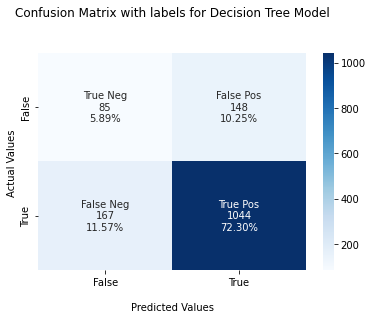

In [190]:
# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
dtc_matrix = dtc_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                dtc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     dtc_matrix.flatten()/np.sum(dtc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dtc_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for Decision Tree Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

### Random Forest Model 
The Random Forest Model is a supervised Machine Learning Algorithm that fits several decision tree classifiers on various sub-samples of the data being analyzed and uses averaging to improve the predictive accuracy and control over-fitting. The Random Forest Model is used widely in Classification and Regression problems. (scikit-learn.org, 2022)

In [191]:
# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_prob = rf.predict_proba(X_test)

In [192]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

Accuracy: 0.8414127423822715
Precision: 0.8680659670164917
Recall: 0.9562345169281585
F1 Score: 0.9100196463654224
Cohens Kappa Score: 0.2552879071778611
Area Under Curve: 0.7793775229211484


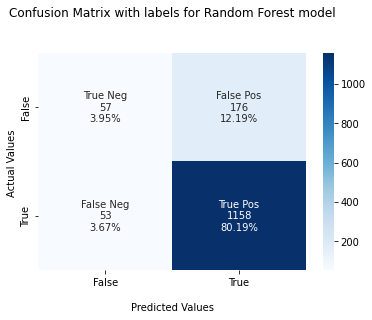

In [193]:
# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
rf_matrix = rf_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_matrix.flatten()/np.sum(rf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(rf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for Random Forest model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

### Naive Bayes Model 
Naive Bayes Model is a supervised learning algorithm based on the Bayes Theorem; a simple mathematical formula used for calculating conditional probabilities. The Naive Bayes Model is suitable for binary and multiclass classifications. (Chauhan, 2022)

In [194]:
# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prob = nb.predict_proba(X_test)

In [195]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

Accuracy: 0.8012465373961218
Precision: 0.8762214983713354
Recall: 0.8885218827415359
F1 Score: 0.8823288232882329
Cohens Kappa Score: 0.24333029030491138
Area Under Curve: 0.7491503138256965


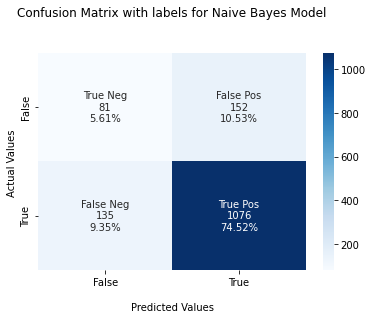

In [196]:
# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
nb_matrix = nb_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     nb_matrix.flatten()/np.sum(nb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for Naive Bayes Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

### K-Nearest Neighbors Model 
The K-Nearest Neighbors Model is a non-parametric supervised learning algorithm used for both classification and regression problems. The K-Nearest Neighbors algorithm assumes that similar things exist near to each other. It uses the number of nearest neighbors to predict the new unknown variable ‘K’. 

In [197]:
# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prob = knn.predict_proba(X_test)

In [198]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

Accuracy: 0.8268698060941828
Precision: 0.8561897702001483
Recall: 0.953757225433526
F1 Score: 0.9023437500000001
Cohens Kappa Score: 0.15921762987875043
Area Under Curve: 0.659542533925426


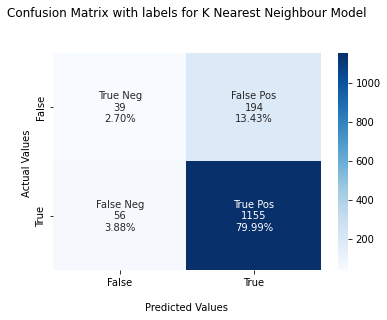

In [199]:
# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
knn_matrix = knn_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                knn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     knn_matrix.flatten()/np.sum(knn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(knn_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for K Nearest Neighbour Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

### Logistic Regression Model 
The logistic regression is a statistical analysis method used to predict the probabilities of outcomes for classification problems with two possible outcome by analyzing the relationship between one or more existing independent variables. Logistic regression is used when the dependent variable is binary.

In [200]:
# Building LR model 
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prob = lr.predict_proba(X_test)

In [201]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

Accuracy: 0.842797783933518
Precision: 0.8539568345323741
Recall: 0.9801816680429397
F1 Score: 0.9127258746635909
Cohens Kappa Score: 0.15792880924000163
Area Under Curve: 0.7547215616505354


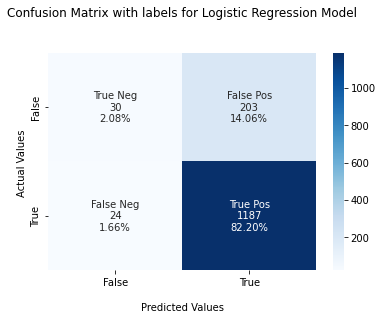

In [202]:
# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
lr_matrix = lr_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_matrix.flatten()/np.sum(lr_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(lr_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for Logistic Regression Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

### Neural Networks Model 
An artificial neural network model is a supervised learning algorithm that can be used to understand multiple levels of data features, and any hierarchical relationship between these features.

In [203]:
# Building NN model 
nn = MLPClassifier(max_iter=500)
nn.fit(X_train,y_train)
nn_prob = nn.predict_proba(X_test)

In [204]:
# Evaluate Model
nn_eval = evaluate_model(nn, X_test, y_test)

Accuracy: 0.8372576177285319
Precision: 0.862555720653789
Recall: 0.9587118084227911
F1 Score: 0.9080954243253814
Cohens Kappa Score: 0.2150285915206247
Area Under Curve: 0.7507876652856682


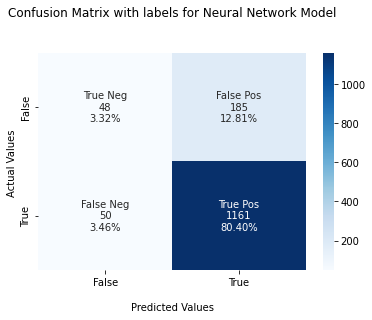

In [205]:
# Print result
print('Accuracy:', nn_eval['acc'])
print('Precision:', nn_eval['prec'])
print('Recall:', nn_eval['rec'])
print('F1 Score:', nn_eval['f1'])
print('Cohens Kappa Score:', nn_eval['kappa'])
print('Area Under Curve:', nn_eval['auc'])

# Plot Confusion Matrix For Binary Classes With Labels And Percentages
nn_matrix = nn_eval['cm']

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                nn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     nn_matrix.flatten()/np.sum(nn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(nn_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels for Neural Network Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

plt.show()

## Model Comparison
Using the evaluation metrics scores of each model, the 6 models were compared side by side to see how they stacked up against each other in three plots, the evaluation metrics, ROC Curve and Cumulative Gains Curve as detailed in Figure 20 (Python Code 21).
The worst model out of the 6 for this investigation was the Decision Tree Model as it only performed well in the precision metrics while it had the worst ROC curve and worst cumulative gains curve. 

The top performing models were the Logistic Regression Model and the Random Forest Model. The Random Forest Model had the second-best Accuracy, Recall, F1 and Kappa metrics while having the best ROC curve and Cumulative Gains Curve. The Logistic Regression Model on the other hand had the best Accuracy, Recall and F1 scores with the second-best ROC and Cumulative Gains Curve.

Based on these results, the Logistic Regression Model and the Random Forest Model will be used for further evaluation and results explanation.

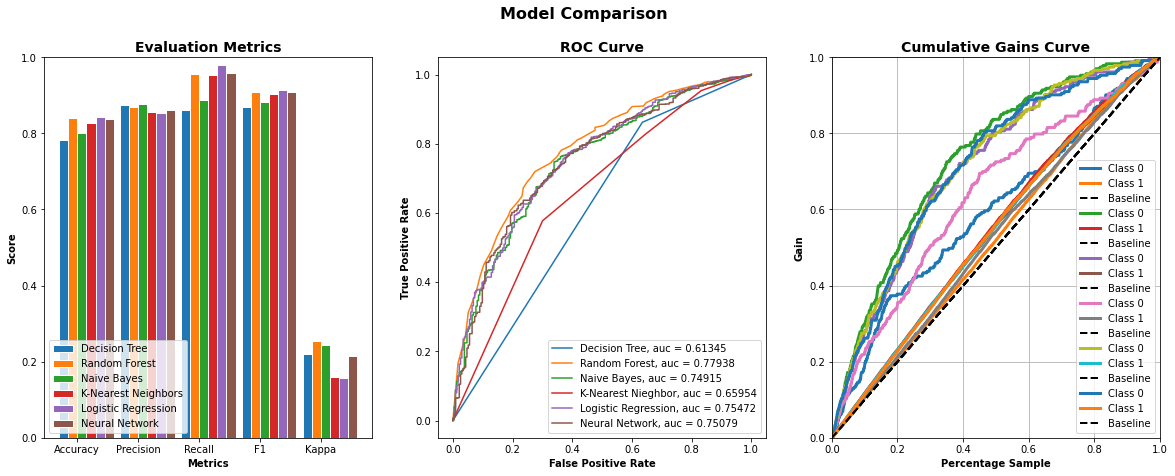

In [206]:
# Intitialize figure with three plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('Model Comparison\n\n', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
nn_score = [nn_eval['acc'], nn_eval['prec'], nn_eval['rec'], nn_eval['f1'], nn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

# Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r6, nn_score, width=barWidth, edgecolor='white', label='Neural Network')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc=3)

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(nn_eval['fpr'], nn_eval['tpr'], label='Neural Network, auc = {:0.5f}'.format(nn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

# Third plot
var = skplt.metrics.plot_cumulative_gain(y_test, dtc_prob,ax=ax3)
skplt.metrics.plot_cumulative_gain(y_test, rf_prob, ax=var)
skplt.metrics.plot_cumulative_gain(y_test, nb_prob, ax=var)
skplt.metrics.plot_cumulative_gain(y_test, knn_prob, ax=var)
skplt.metrics.plot_cumulative_gain(y_test, lr_prob, ax=var)
skplt.metrics.plot_cumulative_gain(y_test, nn_prob, ax=var)

## Configure x and y axis
var.set_xlabel('Percentage Sample', fontweight='bold')
var.set_ylabel('Gain', fontweight='bold')

## Create legend & title
var.set_title('Cumulative Gains Curve', fontsize=14, fontweight='bold')
var.legend()

plt.show()

# Evaluation and results explanation
This project requires that we identify the relevant socioeconomic factors influencing household savings and what correlation these factors have. 
Analysis has shown that 'Region', 'Age', 'Qualification', 'Housing_Status', 'Social_grade', 'No_of_children', 'Household_income’ and 'Household_loans’ are socioeconomic factors that are relevant to whether a household will have savings or not. 

## Important Socioeconomic Factors to Household Savings
Using the fitted results from the Random Forest Model the feature importance was computed based on feature permutation.  The below plot shows that Housing_Status is the most important feature with highest   mean accuracy decrease, followed by Social_grade with and then Household_income. The least important out of the selected features with the lowest mean accuracy decrease is No_of_children.

In [207]:
import time
from sklearn.inspection import permutation_importance

variable_names = df.columns[:-1].values.tolist()
start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=variable_names)

Elapsed time to compute the importances: 5.079 seconds


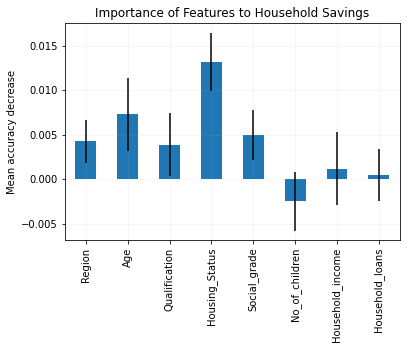

In [208]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Importance of Features to Household Savings")
ax.set_ylabel("Mean accuracy decrease")
plt.grid(axis='y', alpha=0.15)
plt.grid(axis='x', alpha=0.15)
plt.show()

In [209]:
pd.DataFrame(forest_importances,index=variable_names,
    columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
Housing_Status,0.013158
Age,0.007271
Social_grade,0.004986
Region,0.004224
Qualification,0.003878
Household_income,0.001177
Household_loans,0.000485
No_of_children,-0.002493


## Impact of Socioeconomic Factors on Household Savings
Using the results from the fitted logistic regression model, the correlation coefficients are plotted to show the correlations the Socioeconomic Factors have with Household savings. The correlations can either have a positive or negtive impact on the probability of an individual having household savings.

The features Social_grade, Age, Household_income, Qualification have a positive correlation with the probability of Hosehold savings. As such, as the scores of these features increase, there is an increase in probability of a individuals household to have savings when all other variables are held constant and vice versa.

Household_loans, No_of_children and Housing_Status on the other hand have a negative correlation with the probability of Hosehold savings. As the scores of these features increase, there is a decrease in probability of an individuals household having savings when all other variables are held constant and vice versa.

In [210]:
coefs = pd.DataFrame(
    lr.coef_.T,   
    index=variable_names,
    columns=["Coefficients"]).sort_values('Coefficients', ascending=False)

coefs

,Coefficients
Social_grade,0.405335
Age,0.112361
Household_income,0.085608
Qualification,0.060978
Region,0.029828
Household_loans,-0.005007
No_of_children,-0.109031
Housing_Status,-0.413852


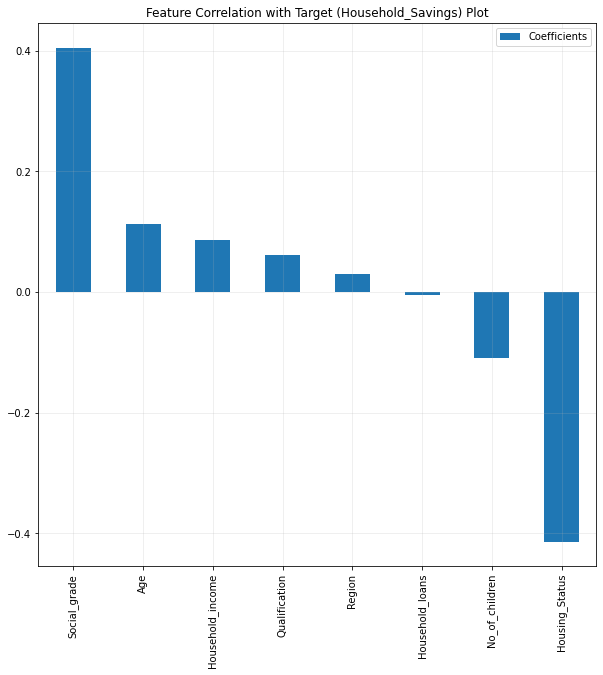

In [211]:
coefs.plot(kind="bar", figsize=(10, 10),title="Feature Correlation with Target (Household_Savings) Plot")
plt.grid(axis='y', alpha=0.25)
plt.grid(axis='x', alpha=0.25)
plt.show()

# Plan for deployment
Based on the achievements of the objectives, it has been identified that 'Region', 'Age', 'Qualification', 'Housing_Status', 'Social_grade', 'No_of_children', 'Household_income’ and 'Household_loans’ are socioeconomic factors that affect household savings.

## Recommendations
Based on the correlation of the factors, positive or negative correlation, the below recommendations are provided.
Social_grade: Taxes should be paid based on social grade brackets with individuals at the lower end of the social ladder paying less than those at the higher end.

Age: Savings incentives should be given to younger people so as to motivate them to save and build a savings culture.

Household_income: Taxes should be paid based on combined Household_income such that the payment of taxes will be a ratio of the combined household income.

Qualification: Incentives (such as increased study days, scholarships, tax incentives) should be added to advancing qualifications so more lower qualified indivduals will be urged to further their education.

Household_loans: Loan rebates and interest incentives should be provided to lower income families to enable them pay off the loans easier and reduce their debt dependencies.

No_of_children: Incentives such as making children specific items tax free and increased child benefits  for homes with children should be provided as the cost of living and raising a child impacts negatively on the household income and wealth. 

## Ongoing Prediction
Using the fitted Random Forest Model that was selected, a prediction can be done at both an individual and group level to assess the possibility of household savings once new responses are received. Once the prediction has been made, adjustments can be made on the correlating features so has to increase or decrease the probability of having household savings if so desired.

## Future Improvements
For future improvements, the impact of 'Housing_Status', will have to be further analyzed as the importance and impact are both very high on the probability of having household savings. Further analysis of this factor will enable additional recommendations to be made.


In [212]:
variable_names = df.columns[:-1].values.tolist()

In [213]:
variables = df.drop('Household_Savings', axis=1)

In [214]:
df['Household_Savings_prediction'] = rf.predict(variables)

In [215]:
df.head(10)

,Region,Age,Qualification,Housing_Status,Social_grade,No_of_children,Household_income,Household_loans,Household_Savings,Household_Savings_prediction
0,10,5,3,2,4,1,12,25,1,1
1,9,5,5,2,5,0,17,25,1,1
2,7,3,5,1,1,0,12,25,0,0
3,9,3,5,4,5,1,16,3,1,1
4,3,3,3,1,3,2,17,26,1,1
5,3,4,3,4,3,0,8,3,1,1
6,5,3,4,3,1,0,12,22,0,0
7,4,6,7,3,1,0,13,22,1,1
8,6,5,3,2,4,0,11,6,1,1
9,8,5,3,1,3,0,14,10,1,1


# Evaluation of possible benefits and commercial risks
The use of data mining is essential in gaining useful information, insights, and trends from historical data to guide future planning, and decision making. This evident from this report as we have seen for example that older individuals who have good qualifications, are in a higher Social_grade and who live in a household that has a higher income will have more savings than an individual who is lower on these indices. 

This report has been able to provide recommendations for decision-making regarding bridging the wealth gap, it is important however to be aware of the risks this knowledge can pose. Risks which must be mitigated against include but are not limited to the following.

Ethical Issues: The use of the predictions in the report enables us to predict an individuals’ household savings status. This knowledge can lead to both negative and positive stereotyping and bias.

Lack of awareness about future change: As with the onset of the COVID-19 pandemic which drastically, changed the economic climate of the world. Users of this project must be aware of changes that might occur in the future that will change the importance and correlation of the factors. 

Inadequate data: The sample size used in this analysis and prediction was 3367 for test and 1444 for training. This totals 4811 individuals which is only 0.0071% of the UK population (Based on 68,207,116 population of U.K as recorded by (Macrotrends, n.d.). As this sample size is so low, there is a high margin of error as the larger the sample size relative to the total population, the greater the confidence in the result, i.e., the lower the potential margin of error. (Lewis, n.d.)


# Conclusion
Using the CRISP-DM process, we have been able to identify the relevant factors influencing household savings. It was noted that Social_grade, Age, Household_income, Qualification have a positive correlation while Household_loans, No_of_children and Housing_Status.

Though there are inherent risks involved in data mining and analysis, the report has enabled us make recommendations that can help to reduce the gap in Household savings (wealth) which outweighs the risk. 